<a href="https://colab.research.google.com/github/jadenkr/DATASCI112/blob/main/FinalProject_DataVisualization_JR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Navajo Nation Water Quality - Data Visualization

[NTUA](https://www.ntua.com/index.html) is a utility company on the Navajo Nation that reports water quality across the Navajo Nation in various communities. I want to visualize Arsenic and how prevealent it is on the Navajo Nation. I also want to see other chemicals that are on the Navajo Nation. For my project, I'll be focused on Arsenic.

My visualizations for the data are as follows:
- `Ditributions` : I want to see the spread of chemicals present and how much is present in the communities on the Navajo Nation.
- `Maps` : I want to show where these communites are as well as how affected by Arsenic they are.

In [30]:
import pandas as pd

In [34]:
# I use this to gain access to my Google Drive where I'll access the data.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [64]:
df_water = pd.read_csv("/content/gdrive/MyDrive/ColabNotebooks/DATASCI112_FinalProject/final_data.csv")

In [81]:
df_water

,Unnamed: 0,Public Water System ID #,Community Name,State,Chlorine Max Level,Chlorine Measured Level,Chlorine Exceeded,Five Haloacetic Acids Max Level,Five Haloacetic Acids Measured Level,Five Haloacetic Acids Exceeded,...,Copper Measured Level,Copper Exceeded,Lead Max Level,Lead Measured Level,Lead Exceeded,Address,Latitude,Longitude,Altitude (Meters),geometry
0,0,093500302,Rock Springs,New Mexico,4.0,0.6637,No,NaN,NaN,NaN,...,0.041,No,NaN,NaN,NaN,"Rock Springs, New Mexico",35.609465,-108.829253,2005.309204,POINT (-108.82925 35.60946)
1,1,NN0400280,Houck and Querino Canyon,Arizona,4.0,0.4213,No,NaN,NaN,NaN,...,0.090,No,15.0,2.0,No,"Houck and Querino Canyon, Arizona",34.048928,-111.093731,1534.655396,POINT (-111.09373 34.04893)
2,2,NN0400813,Pine Springs,Arizona,4.0,0.2900,No,60.0,2.6,No,...,0.476,No,15.0,3.5,No,"Pine Springs, Arizona",35.405300,-109.280097,2124.082520,POINT (-109.28010 35.40530)
3,3,NN0403015,Oak Springs,Arizona,4.0,0.3767,No,NaN,NaN,NaN,...,0.082,No,NaN,NaN,NaN,"Oak Springs, Arizona",35.475560,-109.126940,1995.994629,POINT (-109.12694 35.47556)
4,4,NN0403025,Sawmill,Arizona,4.0,0.1075,No,60.0,11.0,No,...,1.300,No,15.0,2.8,No,"Sawmill, Arizona",35.902511,-109.165931,2339.757080,POINT (-109.16593 35.90251)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,88,NN3503039,Crownpoint,New Mexico,4.0,0.7406,No,NaN,NaN,NaN,...,0.027,No,15.0,2.0,No,"Crownpoint, New Mexico",35.678077,-108.151179,2125.853271,POINT (-108.15118 35.67808)
89,89,NN3503041,Ojo Encino North,New Mexico,4.0,0.6154,No,60.0,6.2,No,...,0.082,No,15.0,1.0,No,"Ojo Encino North, New Mexico",35.955574,-107.347824,2055.937744,POINT (-107.34782 35.95557)
90,90,NN3503060,Casamero Cup,New Mexico,4.0,0.8971,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Casamero Cup, New Mexico",34.519940,-105.870090,1917.724487,POINT (-105.87009 34.51994)
91,91,NN3510002,Boardman Loop,AZ,4.0,0.5992,No,NaN,NaN,NaN,...,0.033,No,NaN,NaN,NaN,"Boardman Loop , AZ",34.048928,-111.093731,1534.655396,POINT (-111.09373 34.04893)


<Axes: title={'center': 'Chemical Distribution'}>

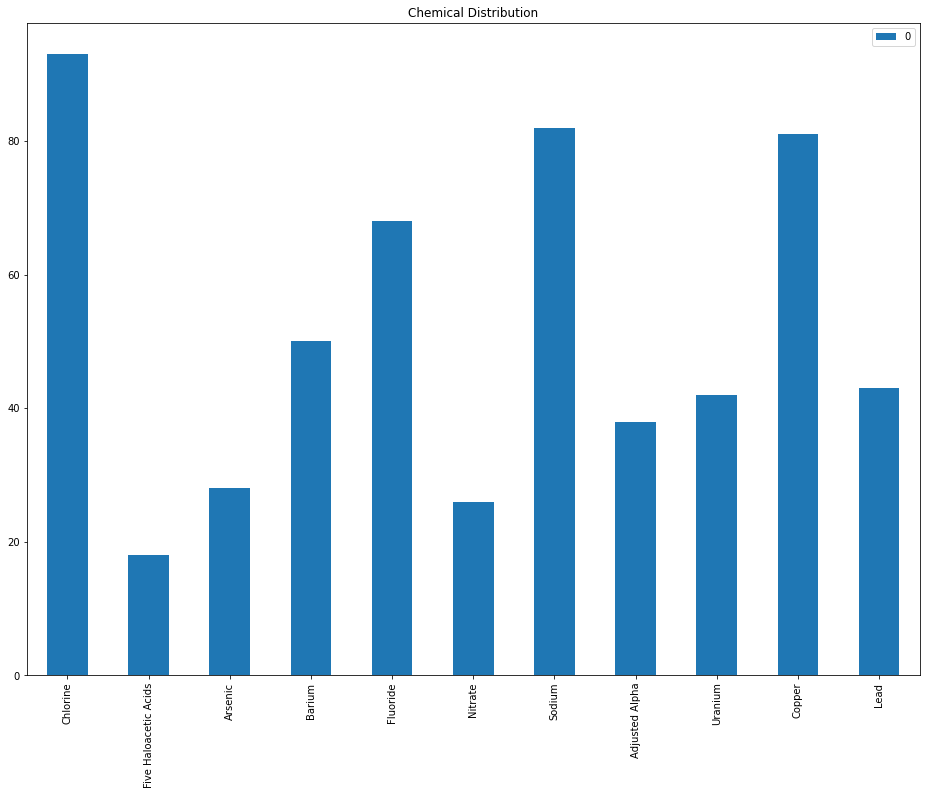

In [98]:
# Plotting how many communities have the resepective chemical in their water supply. Or if they are missing the data.
# You can see that Arsenic is not as common.
chemical_names = ["Chlorine", "Five Haloacetic Acids", "Arsenic", "Barium", "Fluoride", "Nitrate", "Sodium", "Adjusted Alpha", "Uranium", "Copper", "Lead"]
counts = {}
for chemical_name in chemical_names:
  counts[chemical_name] =  df_water[chemical_name + " Measured Level"].count()

pd.DataFrame.from_dict(counts, orient="index").plot.bar(title="Chemical Distribution", figsize=(16,12))

# Maps
Here are some maps to visualize the Navajo Nation and see a bit of the water quality distribuitions.

In [ ]:
!pip install geopandas

In [66]:
import geopandas as gpd

# This shapefile is for indigenous lands in America. I selected only the shape for the Navajo Nation to be used.
gdf_counties = gpd.read_file("/content/gdrive/MyDrive/ColabNotebooks/DATASCI112_FinalProject/cb_2018_us_aiannh_500k.zip")
gdf_navajo = gdf_counties[gdf_counties["NAME"] == "Navajo Nation"]
gdf_navajo

,AIANNHCE,AIANNHNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
151,2430,00041148,2500000US2430,2430,Navajo Nation,86,62504313308,61600579,"MULTIPOLYGON (((-107.67858 36.13219, -107.6607..."


In [67]:
# Converting the df_water datframe to a geodataframe
gdf_water = gpd.GeoDataFrame(
df_water,
geometry=gpd.points_from_xy(df_water["Longitude"],
df_water["Latitude"])
).set_crs(gdf_navajo.crs)
gdf_water

,Unnamed: 0,Public Water System ID #,Community Name,State,Chlorine Max Level,Chlorine Measured Level,Chlorine Exceeded,Five Haloacetic Acids Max Level,Five Haloacetic Acids Measured Level,Five Haloacetic Acids Exceeded,...,Copper Measured Level,Copper Exceeded,Lead Max Level,Lead Measured Level,Lead Exceeded,Address,Latitude,Longitude,Altitude (Meters),geometry
0,0,093500302,Rock Springs,New Mexico,4.0,0.6637,No,NaN,NaN,NaN,...,0.041,No,NaN,NaN,NaN,"Rock Springs, New Mexico",35.609465,-108.829253,2005.309204,POINT (-108.82925 35.60946)
1,1,NN0400280,Houck and Querino Canyon,Arizona,4.0,0.4213,No,NaN,NaN,NaN,...,0.090,No,15.0,2.0,No,"Houck and Querino Canyon, Arizona",34.048928,-111.093731,1534.655396,POINT (-111.09373 34.04893)
2,2,NN0400813,Pine Springs,Arizona,4.0,0.2900,No,60.0,2.6,No,...,0.476,No,15.0,3.5,No,"Pine Springs, Arizona",35.405300,-109.280097,2124.082520,POINT (-109.28010 35.40530)
3,3,NN0403015,Oak Springs,Arizona,4.0,0.3767,No,NaN,NaN,NaN,...,0.082,No,NaN,NaN,NaN,"Oak Springs, Arizona",35.475560,-109.126940,1995.994629,POINT (-109.12694 35.47556)
4,4,NN0403025,Sawmill,Arizona,4.0,0.1075,No,60.0,11.0,No,...,1.300,No,15.0,2.8,No,"Sawmill, Arizona",35.902511,-109.165931,2339.757080,POINT (-109.16593 35.90251)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,88,NN3503039,Crownpoint,New Mexico,4.0,0.7406,No,NaN,NaN,NaN,...,0.027,No,15.0,2.0,No,"Crownpoint, New Mexico",35.678077,-108.151179,2125.853271,POINT (-108.15118 35.67808)
89,89,NN3503041,Ojo Encino North,New Mexico,4.0,0.6154,No,60.0,6.2,No,...,0.082,No,15.0,1.0,No,"Ojo Encino North, New Mexico",35.955574,-107.347824,2055.937744,POINT (-107.34782 35.95557)
90,90,NN3503060,Casamero Cup,New Mexico,4.0,0.8971,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Casamero Cup, New Mexico",34.519940,-105.870090,1917.724487,POINT (-105.87009 34.51994)
91,91,NN3510002,Boardman Loop,AZ,4.0,0.5992,No,NaN,NaN,NaN,...,0.033,No,NaN,NaN,NaN,"Boardman Loop , AZ",34.048928,-111.093731,1534.655396,POINT (-111.09373 34.04893)


<Axes: >

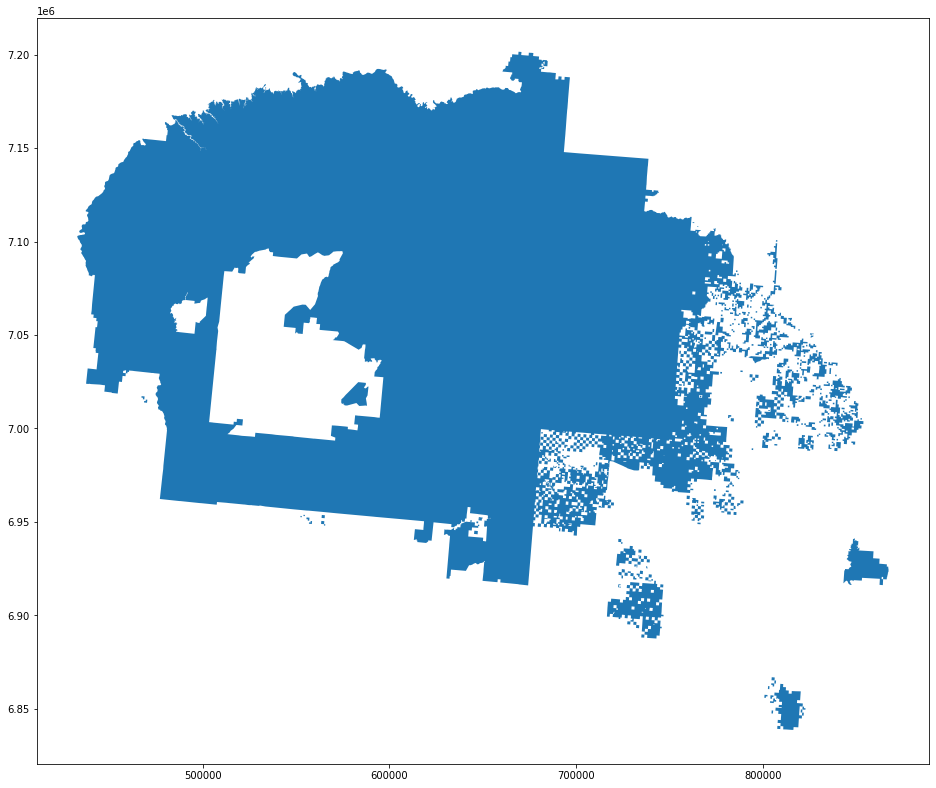

In [68]:
# General plot of the Navajo Nation
gdf_navajo.to_crs("EPSG:3082").plot(figsize = (16, 20))

<Axes: >

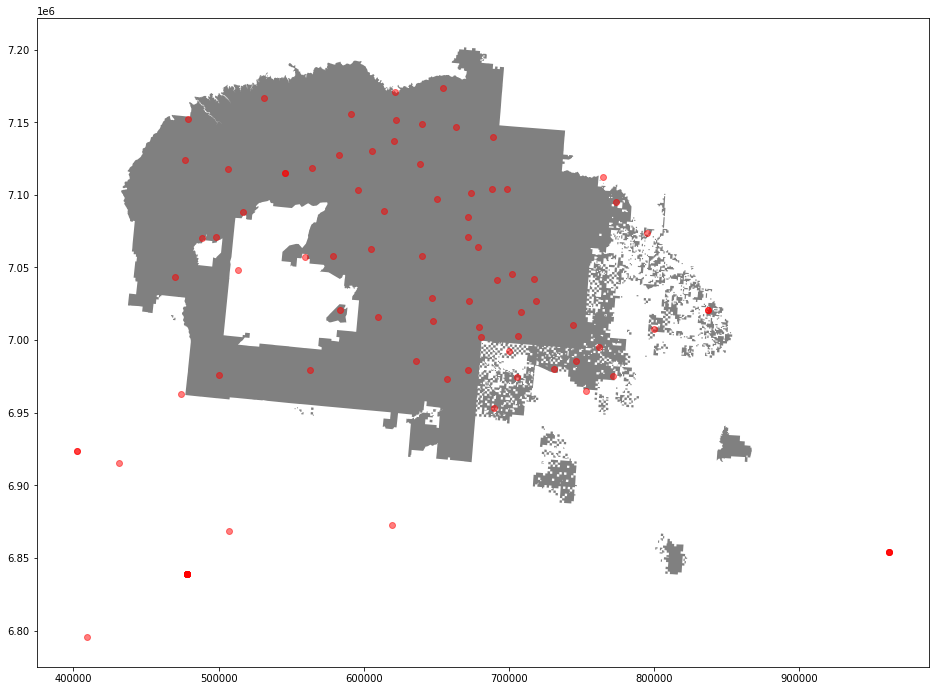

In [77]:
# distribution of the communities on the Navajo Nation as some neighboring towns that was in the NTUA data.
ax = gdf_navajo.to_crs("EPSG:3082").plot(
facecolor="gray", figsize=(16, 20))
gdf_water.to_crs("EPSG:3082").plot(
ax=ax, color="red", alpha=0.5)

<Axes: >

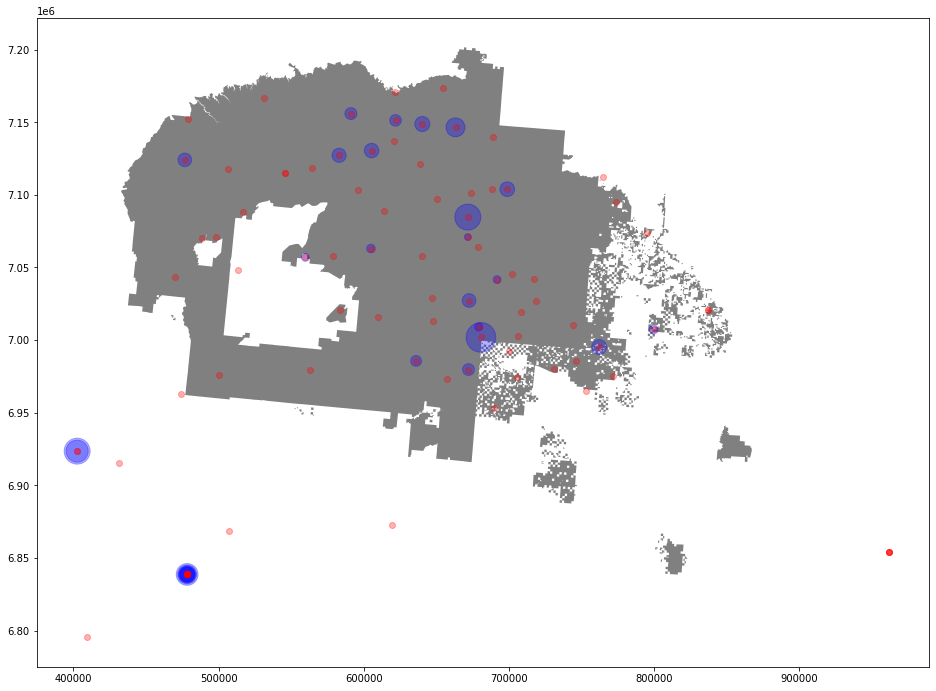

In [80]:
# We can see areas with higher arsenic in blue and
# some communities do not have arsenic levels measured so they are plotted in red.
ax = gdf_navajo.to_crs("EPSG:3082").plot(
facecolor="gray", figsize=(16, 20))
gdf_water.to_crs("EPSG:3082").plot(
ax=ax, color="blue", alpha=0.3,
markersize=20 * gdf_water["Arsenic Measured Level"])
gdf_water.to_crs("EPSG:3082").plot(
ax=ax, color="red", alpha=0.3)